# Email Spam Detection with LLM


## **1. Know the Data**

### Import Libraries

In [1]:
# Importing Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling data in DataFrame

# 2. Visualization Libraries
import matplotlib.pyplot as plt  # For plotting charts
import seaborn as sns  # For statistical data visualization
from wordcloud import WordCloud, STOPWORDS  # For creating word clouds

# 3. Evaluation Metrics Libraries (for model performance)
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, roc_auc_score, 
    roc_curve, classification_report
)

# 4. Data Preprocessing Libraries (Vectorization)
from sklearn.feature_extraction.text import CountVectorizer  # For text vectorization (feature extraction)

# 5. Model Selection (Train-Test Split)
from sklearn.model_selection import train_test_split  # For splitting dataset into train and test sets

# 6. Machine Learning Model Implementation Libraries
from sklearn.naive_bayes import MultinomialNB  # For Naive Bayes classifier
from sklearn.pipeline import Pipeline  # For creating ML pipeline

# 7. NLP & Transformer Model Libraries (BERT fine-tuning)
import torch  # PyTorch for model training

# Import the required modules for transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict  # For handling datasets in Hugging Face

# 8. Warnings Filtering (For cleaner output)
import warnings
warnings.filterwarnings('ignore')

# 9. Matplotlib inline (to display visualizations in the notebook)
%matplotlib inline

### Dataset Loading

# Load Dataset from github repository
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

### Dataset First View

In [2]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [3]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


### Dataset Information

In [4]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [5]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 403


#### Missing Values/Null Values

In [6]:
# Missing Values/Null Values Count
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## **2. Understanding The Variables**

In [7]:
# Dataset Columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


## **3. Data Argument**

In [10]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [11]:
# Removing the unnamed columns (if they exist)
# Use a list of columns to drop and filter only those that exist in the DataFrame
unnamed_cols = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
cols_to_drop = [col for col in unnamed_cols if col in df.columns]

# Drop only the columns that exist
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print("None of the specified unnamed columns exist in the DataFrame")

In [12]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [13]:
# Updated new dataset
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - 1 : Distribution of Spam vs Ham

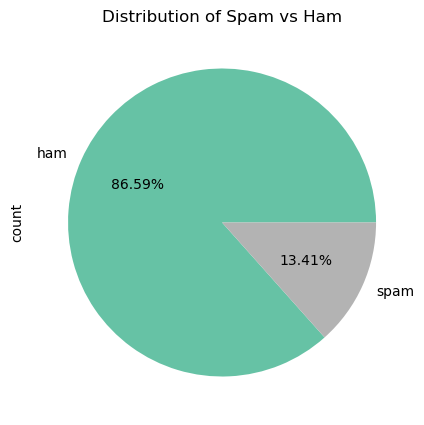

In [14]:
## Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set2')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.

#### Chart - 2 : Most Used Words in Spam Messages

In [15]:
# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

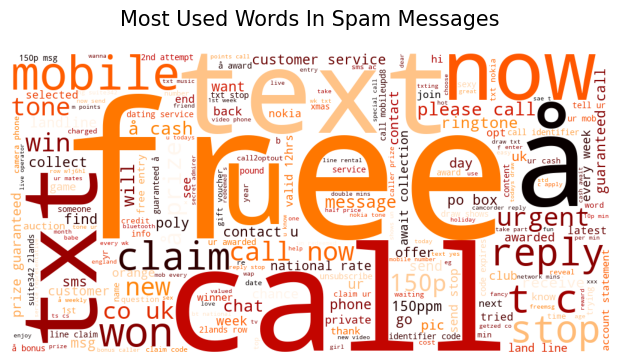

In [16]:
# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

## **5. Feature Engineering & Data Pre-processing**

### Data Splitting

In [17]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

## **6. ML Model Implementation**

In [18]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### ML Model: Multinomial Naive Bayes

In [19]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model

#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.9846448053812394
Test ROC AUC: 0.9487633965375103


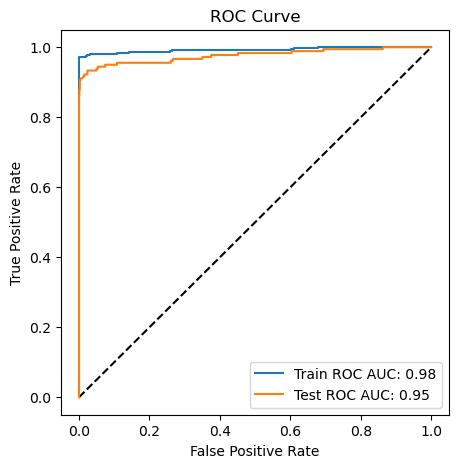


Confusion Matrix:


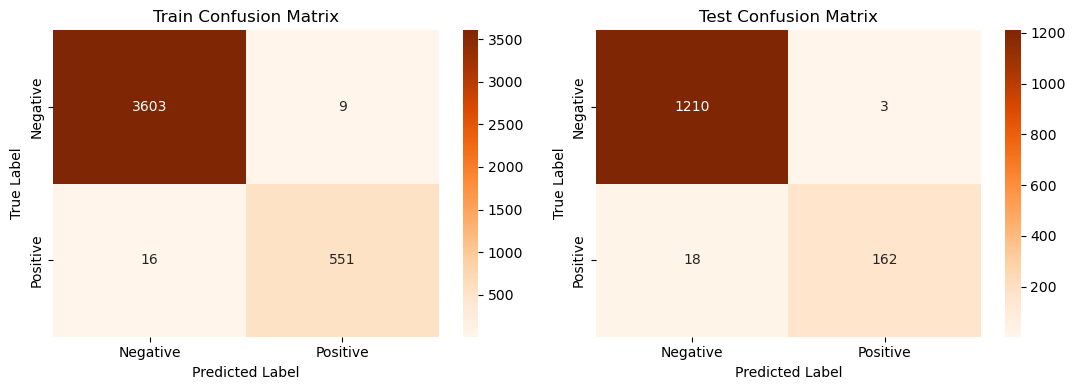


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995579 | 0.997508 |   0.996543 | 3612        |
| 1            |    0.983929 | 0.971781 |   0.977817 |  567        |
| accuracy     |    0.994018 | 0.994018 |   0.994018 |    0.994018 |
| macro avg    |    0.989754 | 0.984645 |   0.98718  | 4179        |
| weighted avg |    0.993998 | 0.994018 |   0.994002 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.985342 | 0.997527 |   0.991397 | 1213        |
| 1            |    0.981818 | 0.9      |   0.93913  |  180        |
| accuracy     |    0.984925 | 0.984925 |   0.984925 |    0.984925 |
| macro avg    |    0.98358  | 0.948763 |   0.965264 | 1393        |
| weighted avg |    0.984887 | 0.984925 |   

In [20]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

## 7. Fine-Tuning BERT for Spam Detection and Saving the Model

In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Renaming the 'Message' column to 'text' for consistency with BERT expectations
df.rename(columns={'Message': 'text'}, inplace=True)

# Renaming the 'Spam' column to 'label' to match what the model expects
df.rename(columns={'Spam': 'label'}, inplace=True)

# Converting the dataframe to a Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Splitting the data into train and test datasets (80% train, 20% test)
dataset_split = dataset.train_test_split(test_size=0.25)
train_dataset = dataset_split['train']
test_dataset = dataset_split['test']

# Check column names to confirm
print(train_dataset.column_names)
print(test_dataset.column_names)

# Load the pre-trained BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=48)

# Apply tokenization to the datasets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# Load the pre-trained BERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments (without evaluation_strategy)
training_args = TrainingArguments(
    output_dir='./results',          # Directory for model checkpoints
    learning_rate=2e-5,              # Learning rate
    per_device_train_batch_size=8,  # Training batch size
    per_device_eval_batch_size=32,   # Evaluation batch size
    num_train_epochs=2,              # Number of epochs
    weight_decay=0.01,               # Regularization strength
    logging_dir='./logs',            # Logging directory
    logging_steps=10,                # Log every 10 steps
    save_steps=500,                  # Save checkpoint every 500 steps
)

# Set up the Trainer
trainer = Trainer(
    model=model,                         # The model to train
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training data
    eval_dataset=test_dataset,           # Test data
    tokenizer=tokenizer,                 # Tokenizer
)

# Fine-tune the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()

# Print evaluation results
print("Evaluation results:", results)

# Save the trained model and tokenizer
model_save_path = './trained_model'
tokenizer_save_path = './trained_tokenizer'

# Save the model and tokenizer
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(tokenizer_save_path)

print(f"Model and tokenizer saved to {model_save_path} and {tokenizer_save_path}")

['Category', 'text', 'label']
['Category', 'text', 'label']


Map:   0%|          | 0/4179 [00:00<?, ? examples/s]

Map:   0%|          | 0/1393 [00:00<?, ? examples/s]

KeyboardInterrupt: 

### Evaluating a Saved BERT Spam Classifier with ROC, Confusion Matrix, and Classification Report

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Paths where the model and tokeniser were saved
model_save_path = './trained_model'
tokenizer_save_path = './trained_tokenizer'

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_save_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_save_path)

# Optionally, check the model and tokenizer are loaded correctly
print(f"Model loaded from {model_save_path}")
print(f"Tokenizer loaded from {tokenizer_save_path}")

# ---- Recreate dataset ----
# Assuming 'df' is still available
df.rename(columns={'Message': 'text', 'Spam': 'label'}, inplace=True)
dataset = Dataset.from_pandas(df)
dataset_split = dataset.train_test_split(test_size=0.25)
train_dataset = dataset_split['train']
test_dataset = dataset_split['test']

# ---- Tokenize ----
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=48)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# ---- Create Trainer ----
training_args = TrainingArguments(output_dir='./results', per_device_eval_batch_size=128)
trainer = Trainer(model=model, args=training_args, eval_dataset=test_dataset, tokenizer=tokenizer)

# ---- Predictions ----
train_preds = trainer.predict(train_dataset)
test_preds = trainer.predict(test_dataset)

y_train_true = train_preds.label_ids
y_train_pred = np.argmax(train_preds.predictions, axis=1)
y_train_prob = train_preds.predictions[:,1]

y_test_true = test_preds.label_ids
y_test_pred = np.argmax(test_preds.predictions, axis=1)
y_test_prob = test_preds.predictions[:,1]

Model loaded from ./trained_model
Tokenizer loaded from ./trained_tokenizer


Map:   0%|          | 0/4179 [00:00<?, ? examples/s]

Map:   0%|          | 0/1393 [00:00<?, ? examples/s]

Model loaded from ./trained_model
Tokenizer loaded from ./trained_tokenizer


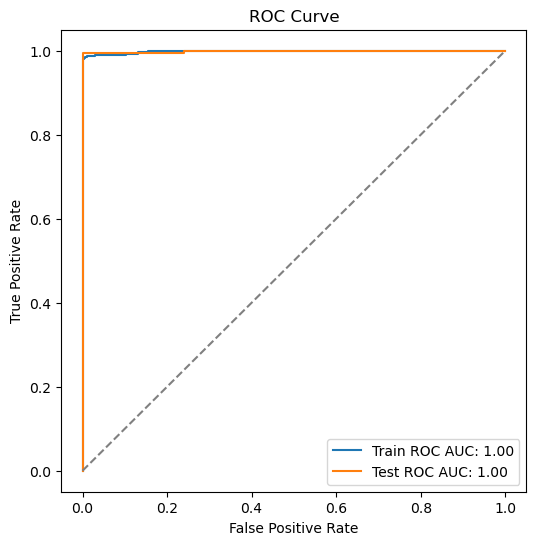

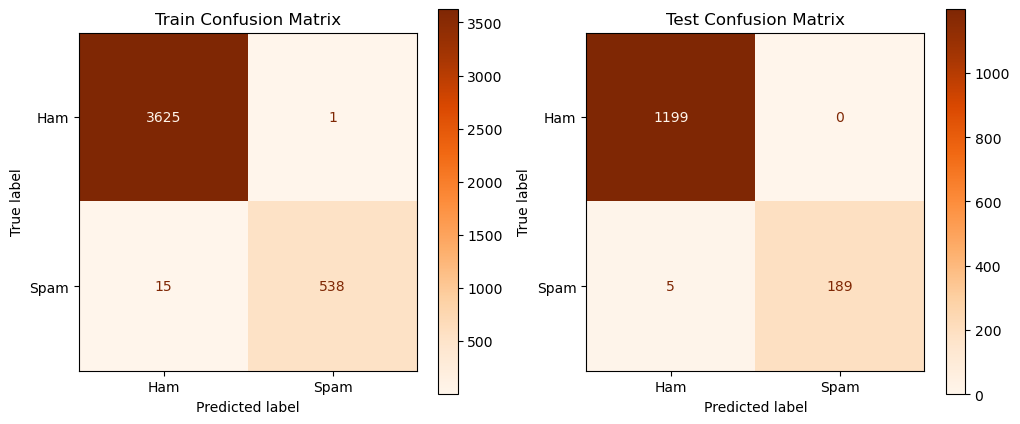

Train Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      3626
        Spam       1.00      0.97      0.99       553

    accuracy                           1.00      4179
   macro avg       1.00      0.99      0.99      4179
weighted avg       1.00      1.00      1.00      4179

Test Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00      1199
        Spam       1.00      0.97      0.99       194

    accuracy                           1.00      1393
   macro avg       1.00      0.99      0.99      1393
weighted avg       1.00      1.00      1.00      1393



In [23]:
# Paths where the model and tokeniser were saved
model_save_path = './trained_model'
tokenizer_save_path = './trained_tokenizer'

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_save_path)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_save_path)

# Optionally, check the model and tokenizer are loaded correctly
print(f"Model loaded from {model_save_path}")
print(f"Tokenizer loaded from {tokenizer_save_path}")
# ---- ROC Curve ----
fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_prob)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6,6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC AUC: {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test ROC AUC: {roc_auc_test:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ---- Confusion Matrices ----
fig, ax = plt.subplots(1,2, figsize=(12,5))
disp_train = ConfusionMatrixDisplay(confusion_matrix(y_train_true, y_train_pred), display_labels=["Ham","Spam"])
disp_test = ConfusionMatrixDisplay(confusion_matrix(y_test_true, y_test_pred), display_labels=["Ham","Spam"])
disp_train.plot(ax=ax[0], cmap=plt.cm.Oranges)
ax[0].set_title("Train Confusion Matrix")
disp_test.plot(ax=ax[1], cmap=plt.cm.Oranges)
ax[1].set_title("Test Confusion Matrix")
plt.show()

# ---- Classification Reports ----
print("Train Classification Report:\n", classification_report(y_train_true, y_train_pred, target_names=["Ham","Spam"]))
print("Test Classification Report:\n", classification_report(y_test_true, y_test_pred, target_names=["Ham","Spam"]))

## **8. Email Spam Detection System**

In [ ]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

### Testing

In [ ]:
# Example of how to use the function
sample_email = 'Dear good morning now only i am up'
result = detect_spam(sample_email)
print(result)

This is a Ham Email!
